In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [3]:
df=pd.read_csv('Downloads/football.csv')

In [4]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [5]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [7]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [8]:
df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [9]:
df.tail()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.1,0,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.0,0,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.0,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.0,0,0
531,Femi Seriki,Sheffield United,ENG,DF,17,1,0,1,0,0,0,-1.0,0,0,0.00,0.0,0,0


In [10]:
df2 = df.iloc[:,[1,2,3]]

In [11]:
df2

,Club,Nationality,Position
0,Chelsea,ENG,"MF,FW"
1,Chelsea,SEN,GK
2,Chelsea,GER,FW
3,Chelsea,ENG,DF
4,Chelsea,ENG,DF
...,...,...,...
527,Sheffield United,FRA,"FW,MF"
528,Sheffield United,ENG,DF
529,Sheffield United,FRA,MF
530,Sheffield United,ENG,"DF,FW"


In [12]:
df['Club'].unique()

array(['Chelsea', 'Manchester City', 'Manchester United', 'Liverpool FC',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United'], dtype=object)

In [13]:
df['Nationality'].unique()

array(['ENG', 'SEN', 'GER', 'ESP', 'FRA', 'ITA', 'BRA', 'CRO', 'USA',
       'DEN', 'MAR', 'SCO', 'ARG', 'POR', 'BEL', 'ALG', 'UKR', 'NED',
       'SWE', 'URU', 'SRB', 'WAL', 'CIV', 'NGA', 'EGY', 'TUR', 'CMR',
       'GUI', 'SUI', 'JPN', 'IRL', 'GRE', 'NIR', 'GHA', 'AUT', 'JAM',
       'RSA', 'CZE', 'POL', 'PAR', 'COD', 'KOR', 'COL', 'GAB', 'NOR',
       'AUS', 'BIH', 'ISL', 'MKD', 'BFA', 'ZIM', 'SVK', 'MEX', 'CAN',
       'MLI', 'IRN', 'NZL', 'MTN', 'SKN'], dtype=object)

In [14]:
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
df['Position']= le.fit_transform(df['Position'])

In [18]:
df['Position']

0      9
1      6
2      3
3      0
4      0
      ..
527    5
528    0
529    7
530    1
531    0
Name: Position, Length: 532, dtype: int32

In [19]:
df['Position'].unique()

array([9, 6, 3, 0, 7, 5, 4, 2, 8, 1])

In [20]:
df['Nationality']

0      ENG
1      SEN
2      GER
3      ENG
4      ENG
      ... 
527    FRA
528    ENG
529    FRA
530    ENG
531    ENG
Name: Nationality, Length: 532, dtype: object

In [21]:
df['Nationality']= le.fit_transform(df['Nationality'])

In [22]:
df['Club']= le.fit_transform(df['Club'])

In [23]:
df['Club']

0       4
1       4
2       4
3       4
4       4
       ..
527    14
528    14
529    14
530    14
531    14
Name: Club, Length: 532, dtype: int32

In [24]:
df['Club'].unique()

array([ 4, 11, 12, 10,  9, 18, 16,  0,  8,  6,  1, 13, 19,  5, 15,  2,  3,
        7, 17, 14])

In [25]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,4,17,9,21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,4,47,6,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,4,21,3,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,4,17,0,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,4,17,0,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [26]:
df['Nationality'].unique()

array([17, 47, 21, 18, 19, 28,  7, 13, 56, 15, 32, 46,  1, 44,  4,  0, 54,
       37, 52, 55, 49, 57,  9, 38, 16, 53, 10, 24, 50, 30, 25, 23, 39, 22,
        3, 29, 45, 14, 43, 42, 11, 31, 12, 20, 40,  2,  6, 27, 34,  5, 58,
       51, 33,  8, 35, 26, 41, 36, 48])

In [27]:
  df.drop('Name',axis=1,inplace=True)

In [28]:
df.head()

,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,4,17,9,21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,4,47,6,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,4,21,3,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,4,17,0,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,4,17,0,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


<AxesSubplot:xlabel='Club', ylabel='Goals'>

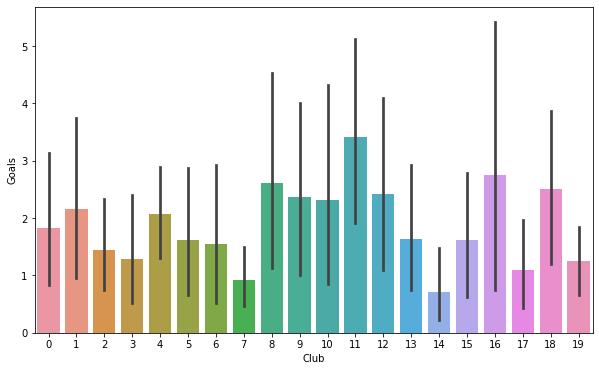

In [29]:
fig=plt.figure(figsize =(10,6))
sns.barplot(x='Club'  ,  y= 'Goals',data=df)

<AxesSubplot:xlabel='Position', ylabel='Goals'>

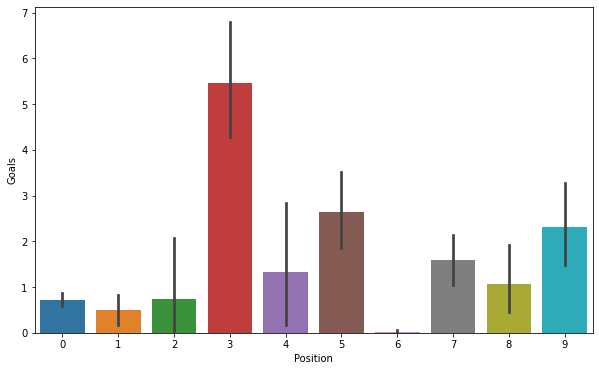

In [30]:
fig= plt.figure(figsize =(10,6))
sns.barplot(x='Position'  ,  y= 'Goals',data=df)

<AxesSubplot:xlabel='Age', ylabel='Goals'>

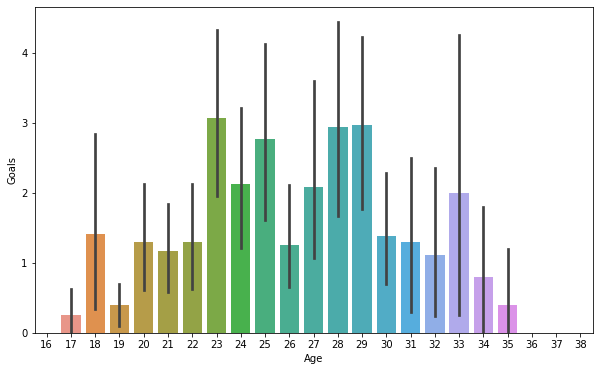

In [32]:
fig= plt.figure(figsize =(10,6))
sns.barplot(x='Age'  ,  y= 'Goals',data=df)

<AxesSubplot:xlabel='Passes_Attempted', ylabel='Assists'>

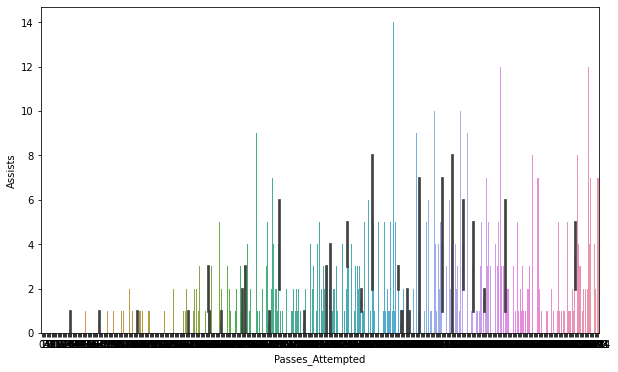

In [33]:
fig= plt.figure(figsize =(10,6))
sns.barplot(x='Passes_Attempted'  ,  y= 'Assists',data=df)

In [39]:
X=df.drop('Goals' , axis = 1)
y =df['Goals']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [43]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [44]:
sc = StandardScaler()

In [45]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [50]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        72
           1       0.38      0.45      0.41        29
           2       0.00      0.00      0.00        10
           3       0.17      0.20      0.18         5
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.50      0.33      0.40         3
          10       0.00      0.00      0.00         2
          11       0.33      1.00      0.50         1
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy                           0.57       133
   macro avg       0.16      0.20      0.17       133
weighted avg       0.57      0.57      0.57       133



In [52]:
print(confusion_matrix(y_test, pred_rfc))

[[60 10  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 9 13  5  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]]
